In [104]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(0)

Index(['grade', 'publication', 'text', 'date'], dtype='object')


<AxesSubplot:xlabel='grade', ylabel='count'>

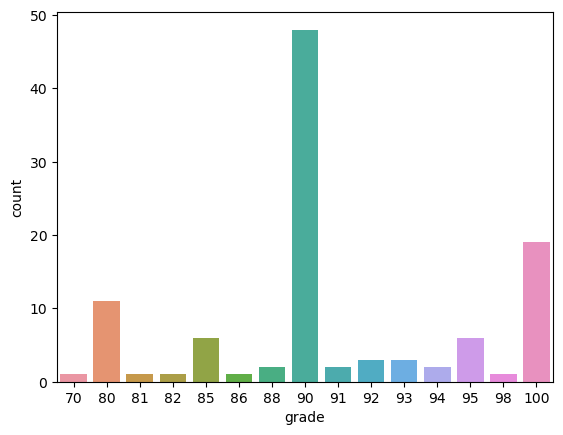

In [120]:
# load data

df = pd.read_csv('./data/animal-crossing.csv')
print(df.columns)
sns.countplot(df, x='grade')

In [149]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


model = SentimentIntensityAnalyzer() # https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
model_name = type(model).__name__
print('Model name: ', model_name)

Model name:  SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [150]:
print('example review: ', df.text[0])
print('review grade: ', df.grade[0])
print(model.polarity_scores(df.text[0]))

example review:  Animal Crossing; New Horizons, much like its predecessors, operates outside of the boundaries of most games. While the most tension you'll ever feel is while sprinting away from wasps, there's a warmth and comfort in the code which you won't find almost anywhere else.
review grade:  100
{'neg': 0.052, 'neu': 0.786, 'pos': 0.161, 'compound': 0.6605}


In [151]:
sample = df.sample(5, random_state=0)
for i, comment in enumerate(sample.text):
    print('---------------------------------')
    print('input: ', comment)
    print('user grade: ', sample.iloc[i].grade)
    print('sentimental score: ',model.polarity_scores(comment)['compound'])


---------------------------------
input:  New Horizons is the near-perfect installment ahead of the 20th anniversary of the series. There is so much to do in this game, and Nintendo has really pushed the limits for the series with the amount of creative freedom they’ve handed over to the player. The only thing that lets it down is the clunkiness of an otherwise delightful multiplayer feature. Still, this is exactly the kind of game I want to be stuck at home with.
user grade:  90
sentimental score:  0.8807
---------------------------------
input:  Animal Crossing: New Horizons takes everything good about Animal Crossing and improves it ten-fold.
user grade:  100
sentimental score:  0.6908
---------------------------------
input:  Animal Crossing: New Horizons is yet another title that you can clearly see Nintendo's mark on it. It aims only to entertain, and it succeeds. If you are looking to distant yourself from all the violence and adrenaline that most games on the market are offerin

In [152]:
import pickle
pickle_out = open(f"./models/{model_name}.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()